In [1]:
%run C:\Users\s162605\Documents\Studie\JAAR3\BEP\sterren\Lissa.ipynb

loading successful!


Integral over Q is: 143.33878129445566
Integral over E is: 38.912374703858966
Integral over e is: -79.37317635062455


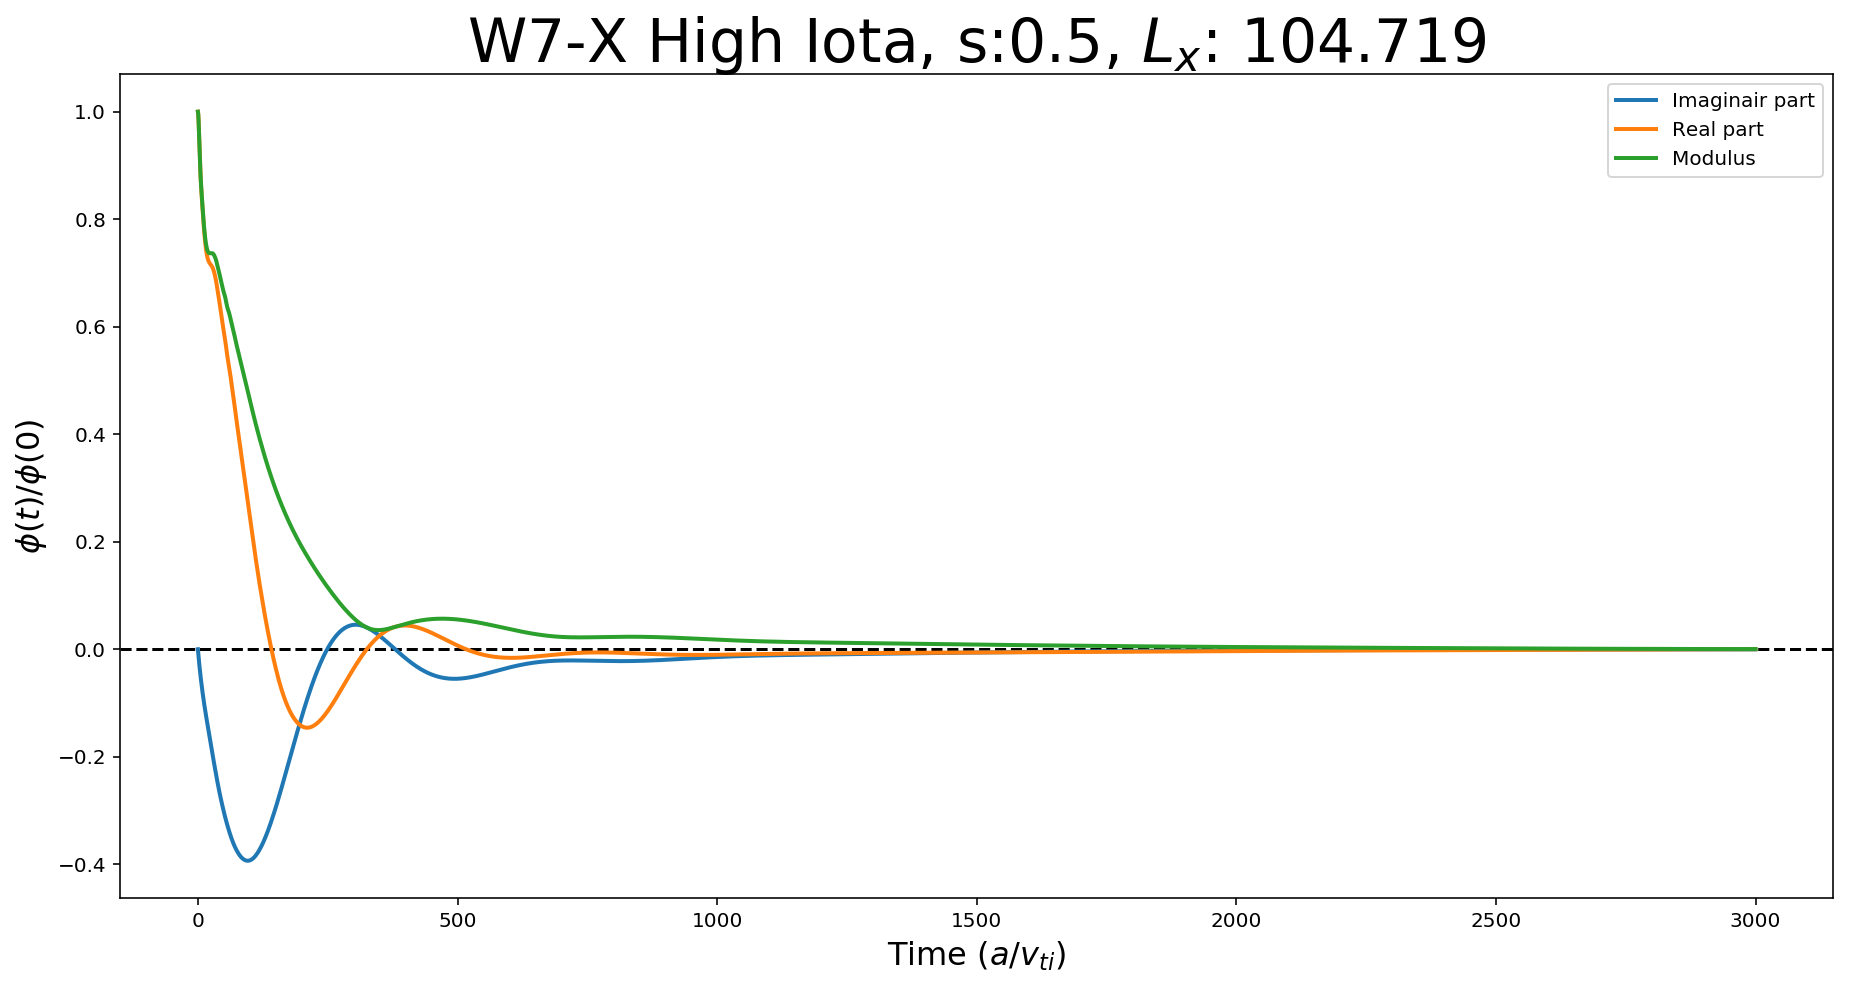

In [2]:
#standard code that works with the newest version of the data. below you find the comparison between the old and the new datasets
data = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhis05/GAM/104.719/gamdiagions_act.dat')

E = (data[:,1]*(1/data[0, 1]))
e = (data[:,2]*(1/data[0, 1]))
t = data[:,0]

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Iota, s:0.5, $L_{x}$: 104.719', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')

Q = np.sqrt(E**2+e**2)
ax1.plot(t, e, linewidth=2, label=('Imaginair part'))
ax1.plot(t, E, linewidth=2, label=('Real part'))
ax1.plot(t, Q, linewidth=2, label=('Modulus'))
plt.legend()

fig.tight_layout()
plt.savefig('C:/Users/s162605/Documents/Studie/JAAR3/BEP/figures/W7Xhis05_104719.pdf', format='pdf', dpi=1200)    

integ1 = (np.trapz(Q,t))
integ2 = (np.trapz(E,t))
integ3 = (np.trapz(e,t))

print("Integral over Q is:", integ1)
print("Integral over E is:", integ2)
print("Integral over e is:", integ3)

In [4]:
#to make sure it takes into account all values until the end of the data and to determine the standard deviation in the residual
n=0
teller=0
residual=0
nfix=0
finalvaluedata=4335 #needs to be adjusted per data set
while n < finalvaluedata:
    if abs((Q[n+1]-Q[n])/(t[n+1]-t[n])) < 0.00001:
        teller=teller+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual=(residual*(n-nfix)+Q[n])/(n+1-nfix)#to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else:
        teller=0
        residual=0
        nfix = (n+1)
    n=n+1
print("Assuming that the residual is the average value of Q from the point where the absolute value of the derivative of Q  becomes less than 0.00001 and stays below that value onwards till the end of the data, we can say that:")
print("The values of n, Q[n] and t at the start of the averaging are: n =", n-teller, "Q =", Q[n-teller], "t =", t[n-teller])
print("The amount of data points over which the average is taken =", teller)
listofqvalues=Q[(n-teller):n]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std=np.std(listofqvalues)
#meanres=np.mean(listofqvalues)
print("The residual value is:",residual, "+-", std)

Assuming that the residual is the average value of Q from the point where the absolute value of the derivative of Q  becomes less than 0.00001 and stays below that value onwards till the end of the data, we can say that:
The values of n, Q[n] and t at the start of the averaging are: n = 2569 Q = 0.005727645944817176 t = 1777.7
The amount of data points over which the average is taken = 1766
The residual value is: 0.0023432824293315893 +- 0.001602729745802972


Integral over Q_old is: 142.0649780167435
Integral over Q_new is: 143.97001525632075
Integral over E_old is: 38.590698235110544
Integral over E_new is: 38.47707425172713
Integral over e_old is: -78.3049746921596
Integral over e_new is: -79.83462492304261


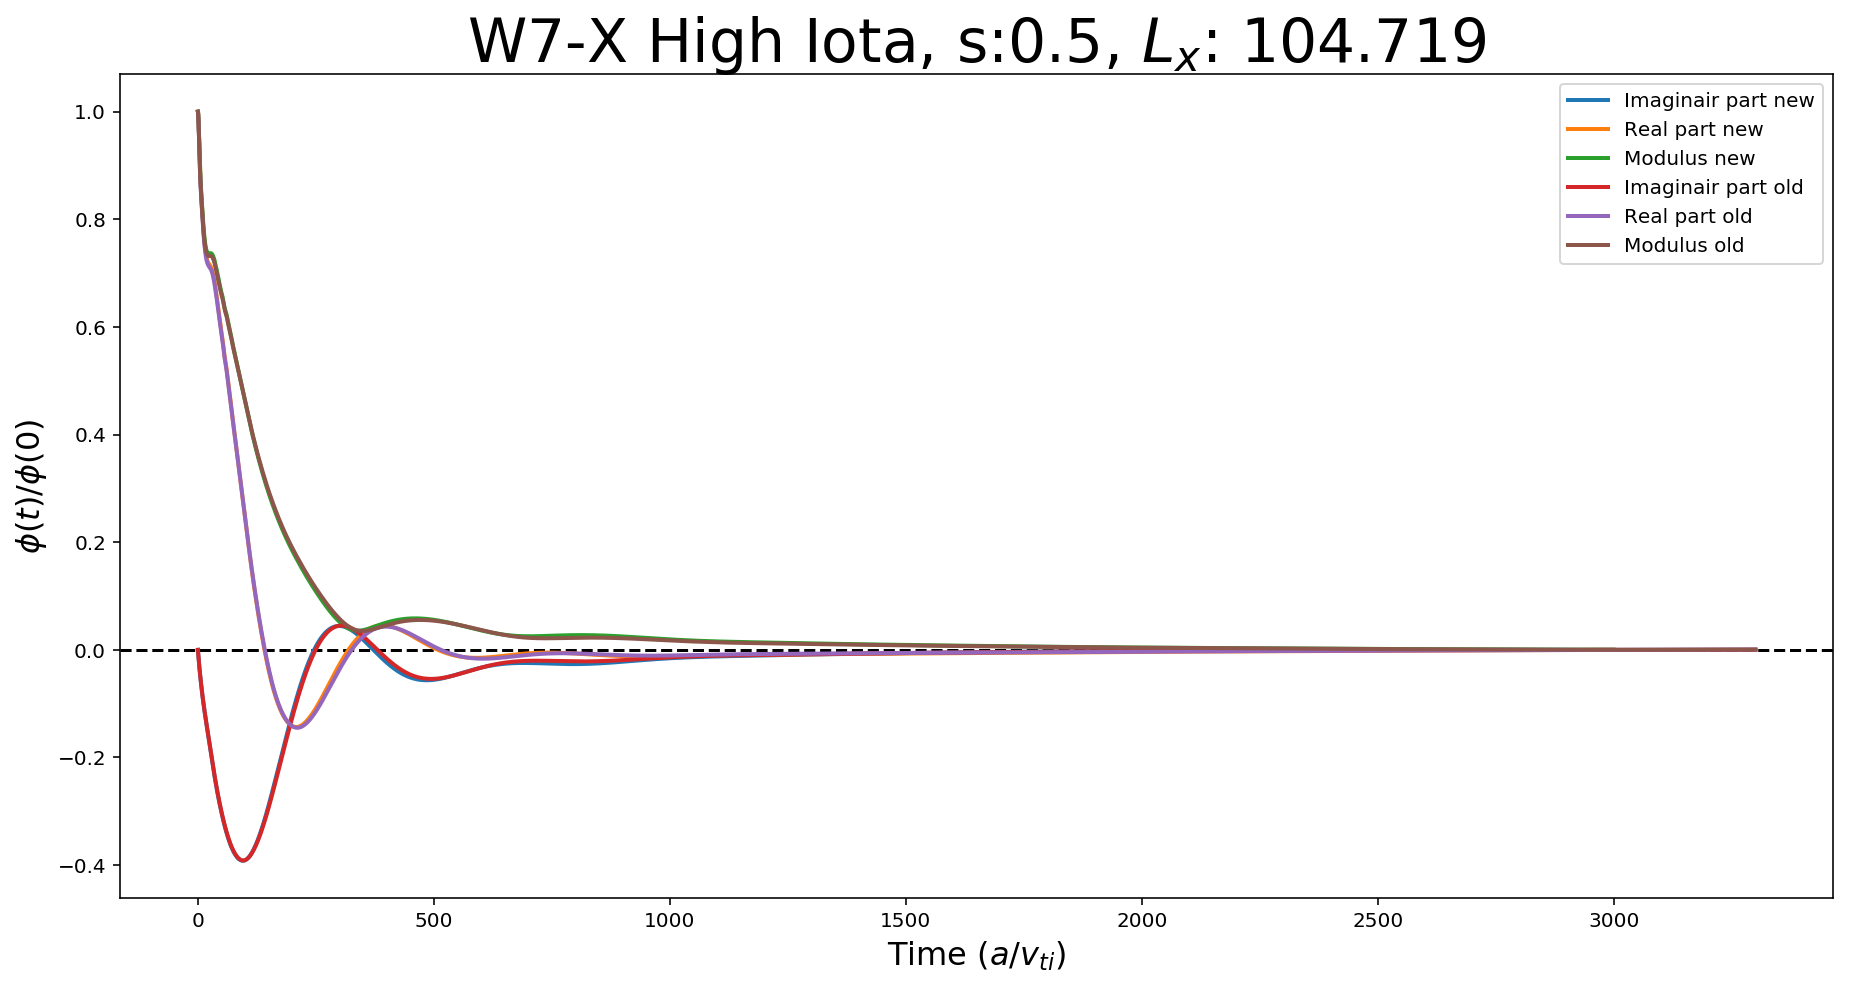

In [5]:
#Comparison old and new datasets 
datanew = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhis05/GAM/104.719/gamdiagions_act.dat')
dataold = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/Emmasnotebooks/kopievanalleeerstedata/dataset1.dat')
E_new = (datanew[:,1]*(1/datanew[0, 1]))
e_new = (datanew[:,2]*(1/datanew[0, 1]))
t_new = datanew[:,0]
E_old = (dataold[:,1]*(1/dataold[0, 1]))
e_old = (dataold[:,2]*(1/dataold[0, 1]))
t_old = dataold[:,0]

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Iota, s:0.5, $L_{x}$: 104.719', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')

Q_new = np.sqrt(E_new**2+e_new**2)
ax1.plot(t_new, e_new, linewidth=2, label=('Imaginair part new'))
ax1.plot(t_new, E_new, linewidth=2, label=('Real part new'))
ax1.plot(t_new, Q_new, linewidth=2, label=('Modulus new'))
Q_old = np.sqrt(E_old**2+e_old**2)
ax1.plot(t_old, e_old, linewidth=2, label=('Imaginair part old'))
ax1.plot(t_old, E_old, linewidth=2, label=('Real part old'))
ax1.plot(t_old, Q_old, linewidth=2, label=('Modulus old'))
plt.legend()
fig.tight_layout()

integ1_new = (np.trapz(Q_new,t_new))
integ2_new = (np.trapz(E_new,t_new))
integ3_new = (np.trapz(e_new,t_new))
integ1_old = (np.trapz(Q_old,t_old))
integ2_old = (np.trapz(E_old,t_old))
integ3_old = (np.trapz(e_old,t_old))
print("Integral over Q_old is:", integ1_old)
print("Integral over Q_new is:", integ1_new)
print("Integral over E_old is:", integ2_old)
print("Integral over E_new is:", integ2_new)
print("Integral over e_old is:", integ3_old)
print("Integral over e_new is:", integ3_new)